In [22]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

elec_data= pd.read_csv('election_data_clean.csv',index_col=0)

C:\Users\spear_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
#Fix Data Types
type_dict = {'County Code':str,
             'Election Date':str,
             'Precinct Number':str,
             'Precinct Polling Location':str,
             'Registered Republicans':int,
             'Registered Democrats':int,
             'Registered Other':int,
             'Total Registered':int,
             'Contest Name':str,
             'District':str,
             'Candidate':str,
             'Party':str,
             'Vote Total':int,
             'Precinct_Full_ID':str}

elec_data = elec_data.astype(type_dict)

In [24]:
#Checks for Null Data
print(f"There are {elec_data.isnull().sum().sum()} null cells")

# #Sets 'Total Registered' to the sum of the number of registered voters of types 'Democrat', 'Republican', and 'Other'
# elec_data['Total Registered']=(elec_data['Registered Republicans'] \
#                                 + elec_data['Registered Democrats'] \
#                                 + elec_data['Registered Other'])

There are 0 null cells


In [25]:
#Checks for Precincts with no data

precinct_gb = elec_data.groupby('Precinct_Full_ID')

missing = False
for precinct in precinct_gb.groups.keys():
    df = precinct_gb.get_group(precinct)
    if len(df)<20:
        print(precinct)
        missing = True
        break
if missing == False:
    print("No precincts are missing all data")


No precincts are missing all data


In [40]:
# Checks for other aliases of 'null' in each column
x = float('nan')
for col in elec_data.columns:
    print(f" {elec_data[col].value_counts()}" )
    
    x = input('Continue?(y/n) ')
    if x.lower() == 'n':
        break


    

 PAL    100008
DAD     94600
BRO     69667
HIL     59816
PIN     36456
        ...  
LIB       928
FRA       927
HAM       888
LAF       545
UNI       340
Name: County Code, Length: 67, dtype: int64
Continue?(y/n) y
 11/06/2018    725910
Name: Election Date, dtype: int64
Continue?(y/n) y
 1       4884
5       4636
3       4570
8       4541
6       4541
        ... 
199      100
296      100
291      100
170      100
8001      96
Name: Precinct Number, Length: 2567, dtype: int64
Continue?(y/n) y
 nan                                         10075
1154, 1156, 1158, 1160, 1162, 1166, 1168     1177
101                                           905
Orange Blossom Bus Center                     812
PCT 893/895/919 0563                          806
                                            ...  
PCT 226 0123                                  100
PCT 210 0109                                  100
360 - THE VINE CHURCH                         100
PCT 140 0074                                  100

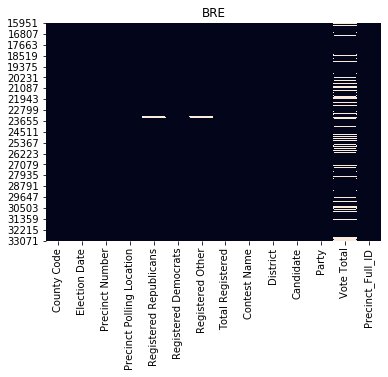

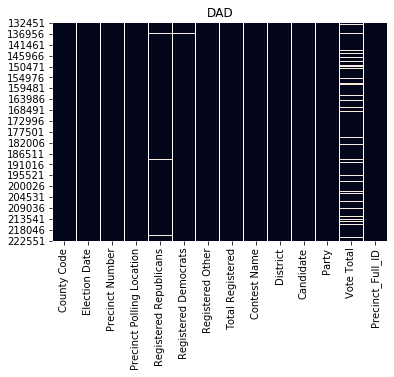

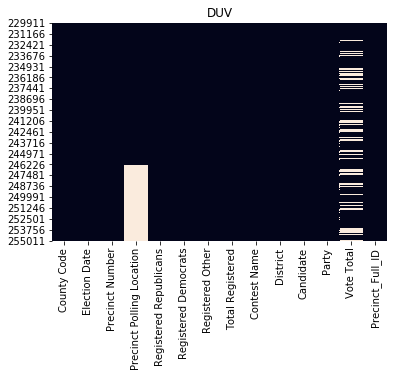

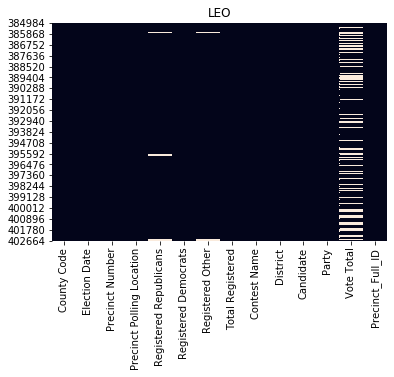

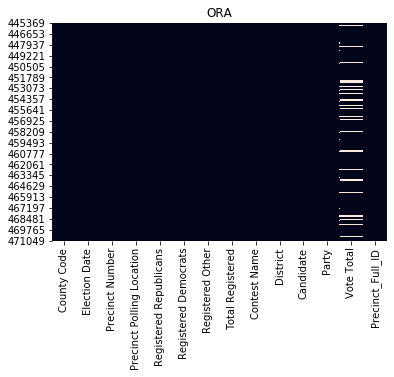

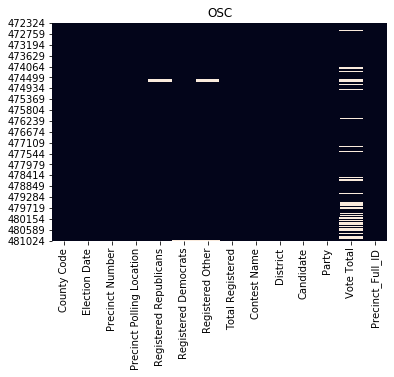

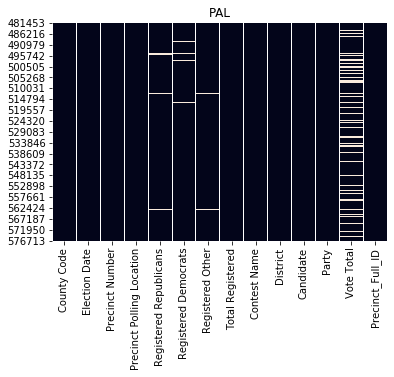

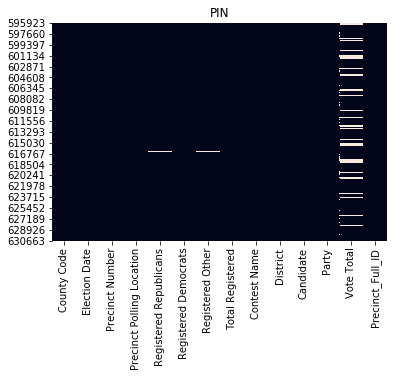

In [55]:
#Finds 0s and 'nan's by county, except for entries with 'Vote Total'=0, which is expected.
null_counties = []
county_gb = elec_data.groupby('County Code')
counties = list(county_gb.groups.keys())
for county in counties:
    test_for = ((county_gb.get_group(county)=='nan') + (county_gb.get_group(county)== 0))
    if test_for.sum().sum()==test_for['Vote Total'].sum():
        pass
    else:
        null_counties.append(county)
        
        

for county in null_counties:
    test_for = ((county_gb.get_group(county)=='nan') + (county_gb.get_group(county)== 0))
    plt.figure()
    sns.heatmap(test_for,cbar=False)
    plt.title(county)
    plt.savefig(f"{county}-null-heatmap")